In [1]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

# WordCloud of Eminem Lyrics

In [15]:
import sys
import lyricsgenius
import collections
from collections import Counter
import os
from os import path, getcwd
import pandas as pd
import json 
import numpy as np
import re
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mishals/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Reading Data
file_path = path.relpath("files/Lyrics_Eminem.json")
d = json.load(open(file_path,'r'))
d.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'followers_count', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'iq', 'description_annotation', 'user', 'songs'])

In [4]:
#Filtering Data
songs = d['songs']
df = pd.DataFrame(songs)
#list(df.columns)
df = df[['title','lyrics']]

#pd.set_option('max_colwidth', 150) #Better view for dataframe
em = df[['lyrics']]
em

,lyrics
0,"[Intro]\n""Look, I was gonna go easy on you not..."
1,"[Intro]\nYou sound like a bitch, bitch\nShut t..."
2,"[Intro]\nUgh, you're a monster\n\n[Verse 1: Em..."
3,"[Intro]\nLook, if you had one shot or one oppo..."
4,[Intro: Rihanna]\nI'm friends with the monster...
...,...
513,Due to a massive amount of bootlegging and con...
514,"[Intro]\nYou sound like a bitch, bitch\nShut t..."
515,"May I have your attention, please?\nMay I have..."
516,\n Lyrics for this song h...


In [5]:
#Cleaning Data

#Removing Punctuations
def rp(text):
    return  " ".join(re.findall("[a-zA-Z]+", text))

em['lyrics'] = em['lyrics'].apply(lambda x: rp(x))


#Removing Small Words (less than 3 letters)
def rsw(text):
    text = text.split(' ')
    text = [x for x in text if len(x)>3]
    return ' '.join(text)

em['lyrics'] = em['lyrics'].apply(lambda x: rsw(x))

#Lowercase
em['lyrics'] = em['lyrics'].apply(lambda x: x.lower())

#Removing Duplicates
em.drop_duplicates(keep=False, inplace=True)

em

,lyrics
0,intro look gonna easy hurt your feelings only ...
2,intro monster verse eminem swallow bottle alco...
3,intro look shot opportunity seize everything e...
4,intro rihanna friends with monster that under ...
5,intro joyner lucas woah joyner joyner yeah yea...
...,...
510,intro merhaba merhaba kendimi tmama izin kendi...
512,lyrics unfinished eminem shady family hold dow...
513,massive amount bootlegging constant downloadin...
515,have your attention please have your attention...


In [6]:
#Setting and removing the Stopwords

file_path = path.relpath("files/sw.txt")
with open(file_path, 'r') as f:
    y = f.read().split('\n')
    
stop = set(stopwords.words("english"))
stop.update(y)

def rstw(text):
    text = text.split(' ')
    text = [x for x in text if x not in stop]
    return ' '.join(text)

em['lyrics'] = em['lyrics'].apply(lambda x: rstw(x))
em

,lyrics
0,look gonna easy hurt feelings going chance min...
2,monster eminem swallow bottle alcohol feel lik...
3,look shot opportunity seize everything ever wa...
4,rihanna friends monster along voices inside he...
5,joyner lucas woah joyner joyner joyner lucas d...
...,...
510,merhaba merhaba kendimi tmama izin kendim shad...
512,lyrics unfinished eminem shady family hold lik...
513,massive amount bootlegging constant downloadin...
515,attention please attention please real slim sh...


##### Common Words

In [7]:
# Getting the Common Words

x = []
for song in em.iterrows():
    x += song[1]['lyrics'].split(' ')
    
topwords = Counter(x).most_common()
topwords[:5]

[('like', 3093),
 ('know', 1287),
 ('back', 1264),
 ('eminem', 1245),
 ('never', 795)]

In [8]:
top = topwords[:10]
top.reverse()
x , y = zip(*(top))

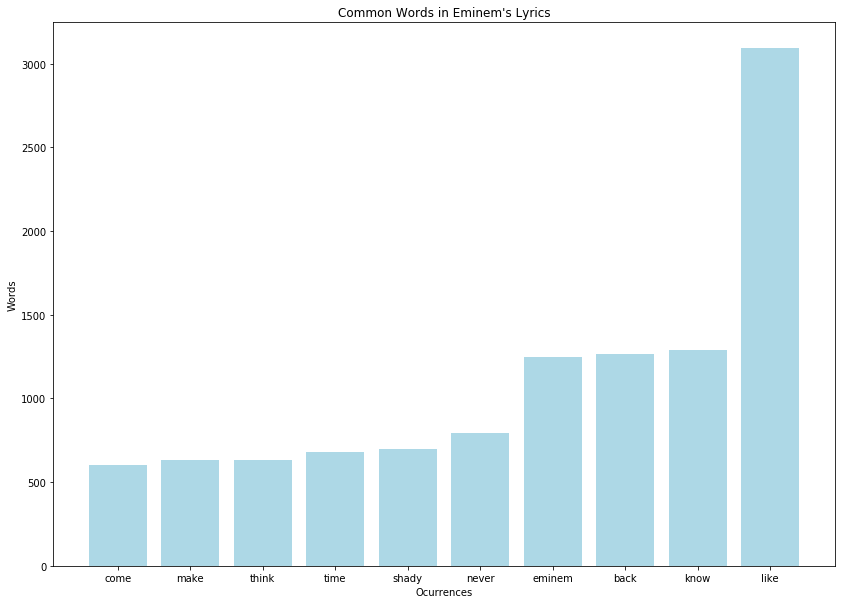

In [11]:
#Plot Bar Graph

plt.figure(figsize=(14, 10))
plt.bar(x, y, color = 'lightblue')

plt.title("Common Words in Eminem's Lyrics")
plt.xlabel('Ocurrences')
plt.ylabel('Words')
plt.show()

##### Word Cloud

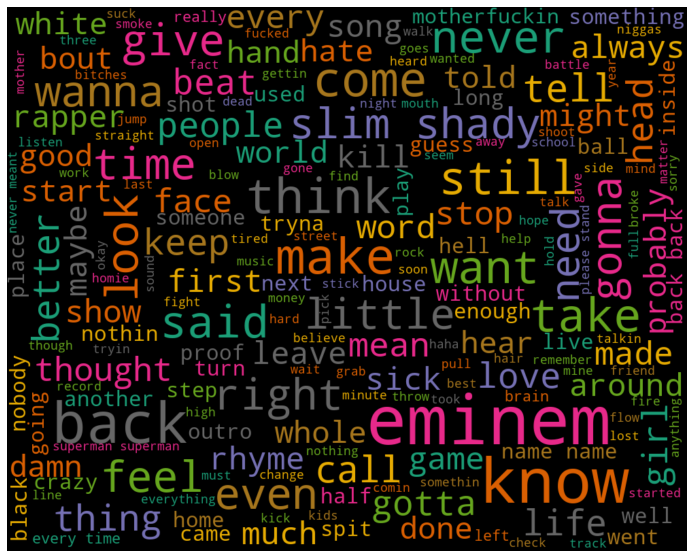

In [12]:
#Generating WordCloud
text = " ".join(twt for twt in em.lyrics)


#len(text)

wc= WordCloud(width=1000, height=800, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(text)

plt.figure(figsize = (14, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word clouds simply make the words that appear the most often the biggest. 

#### As you can see from the word cloud, the words that appear a lot in Eminem's lyrics are basic words because his lyrical vocabulary is amazingly vast and has variation of topics in his songs so the topic words and important words do not appear consistently on his lyrics

###### Adding a mask to better visualize the WordCloud:

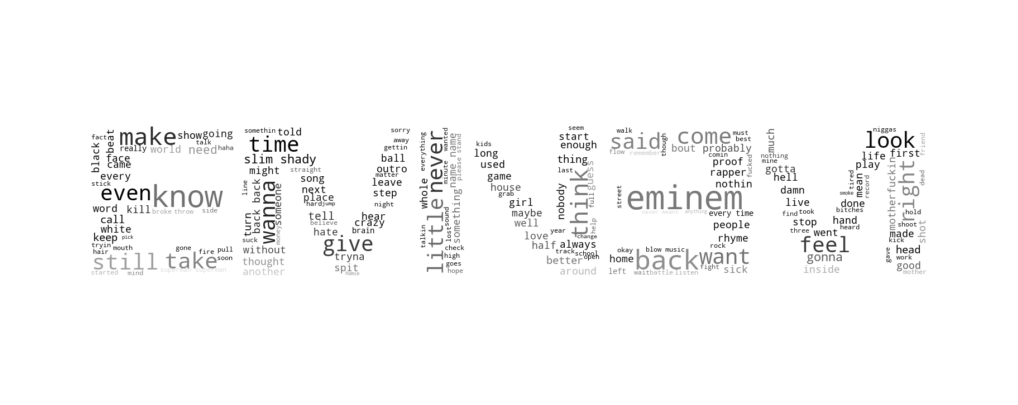

In [32]:
#Generating Masked WordCloud
text = " ".join(twt for twt in em.lyrics)

mask = np.array(Image.open("files/eminem.jpg"))
wc = WordCloud(background_color="white", mask=mask, max_font_size=120, random_state=21, width=mask.shape[1], height=mask.shape[0])
wc.generate(text)
# create coloring from image
plt.figure(figsize = (18, 10))
ic = ImageColorGenerator(mask)
plt.imshow(wc.recolor(color_func=ic), interpolation="bilinear")
plt.axis("off")
plt.show()